#  1. python实现直方图均衡化原理

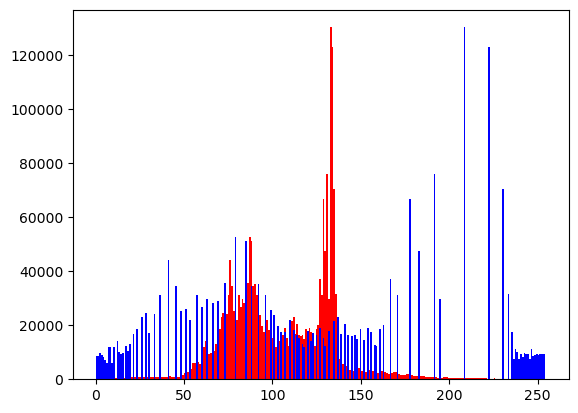

In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# 读取图片
img = cv.imread('gray_test.jpg', 0)
# 将二维数字图像矩阵转变为一维向量
rk = img.flatten()

# 读取图片灰度直方图
# bins为直方图直方柱的取值向量
# hist为bins各取值区间上的频数取值
hist, bins = np.histogram(rk, 256,[0, 256])

# 计算累计分布函数
hist_cum = hist.cumsum()

# 计算灰度均衡化映射
cdf = (hist_cum-hist_cum.min())*(255-0)/(hist_cum.max() - hist_cum.min()) + 0
cdf = cdf.astype('uint8')

# 原始图像灰度直方图
plt.hist(rk, 256, [0, 255], color = 'r')
cv.imshow('原图像', img)

# 直方图均衡化
imgDst = cdf[img]
cv.imshow("直方图均衡化后的图像", imgDst)
plt.hist(imgDst.flatten(), 256, [0, 255], color = 'b')

plt.show()

# 2. python实现高斯噪声原理

In [8]:
import numpy as np
import cv2 as cv
import random


img_gau = cv.imread('gray_test.jpg', 0)
NoiseImg = img_gau
NoiseNum = int(0.8*img_gau.shape[0]*img_gau.shape[1])
for i in range(NoiseNum):
    # 每次取一个随机点
    # 把一张图片的像素用行和列表示的话，randX代表随机生成的行， randY代表随机生成的列
    # random.randint生成随机整数
    # 高斯噪声图片边缘不处理，故为-1.
    randX = random.randint(0, img_gau.shape[0]-1)
    randY = random.randint(0, img_gau.shape[1]-1)
    # 此处在原有像素灰度值上加上随机数
    NoiseImg[randX,randY] = NoiseImg[randX,randY]+random.gauss(2, 4)
    # 若灰度值小于0则强制为0，若灰度值大于255则强制为255
    if NoiseImg[randX,randY]<0:
        NoiseImg[randX,randY] = 0
    elif NoiseImg[randX,randY]>255:
        NoiseImg[randX,randY] = 255
img_origin = cv.imread('gray_test.jpg')
img2 = cv.cvtColor(img_origin, cv.COLOR_BGR2GRAY)
cv.imshow('原图像', img2)
cv.imshow('高斯噪声图', NoiseImg)
cv.waitKey(0)

-1

# 3.python实现椒盐噪声原理

In [ ]:
import numpy as np
import cv2 as cv
import random


img_gau = cv.imread('gray_test.jpg', 0)
NoiseImg = img_gau
NoiseNum = int(0.2*img_gau.shape[0]*img_gau.shape[1])
for i in range(NoiseNum):
    # 每次取一个随机点
    # 把一张图片的像素用行和列表示的话，randX代表随机生成的行， randY代表随机生成的列
    # random.randint生成随机整数
    # 椒盐噪声图片边缘不处理，故为-1.
    randX = random.randint(0, img_gau.shape[0]-1)
    randY = random.randint(0, img_gau.shape[1]-1)
    # random.random生成随机浮点数，随意取到一个像素点有一半的可能是白点255，一半的可能是黑点0
    if random.random()<=0.5:
        NoiseImg[randX,randY] = 0
    else:
        NoiseImg[randX,randY] = 255

img_origin = cv.imread('gray_test.jpg')
img2 = cv.cvtColor(img_origin, cv.COLOR_BGR2GRAY)
cv.imshow('source', img2)
cv.imshow('test', NoiseImg)
cv.waitKey(0)